<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('wine.csv')

In [ ]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
data.drop('Type', axis=1, inplace=True)

In [ ]:
data.isna().sum()

,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0
Color,0


In [ ]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


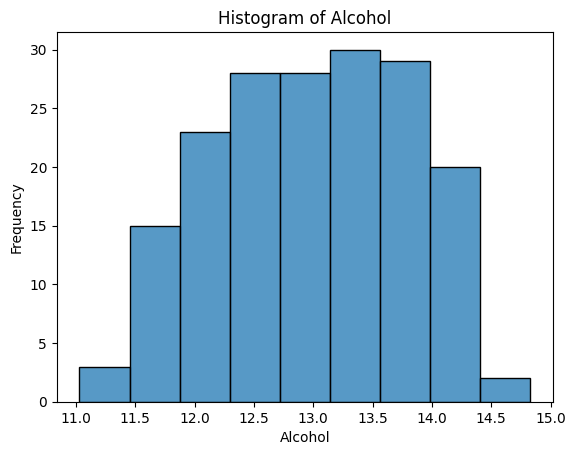

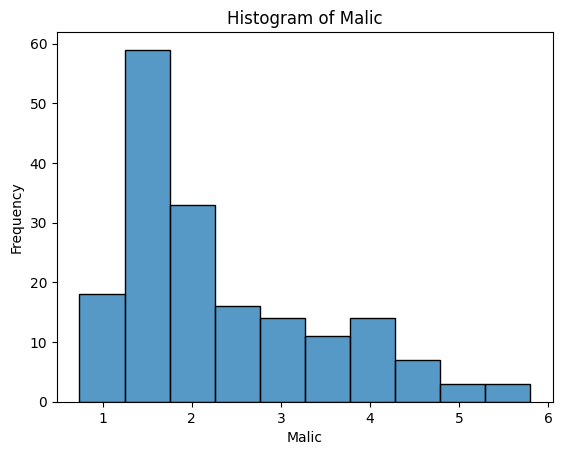

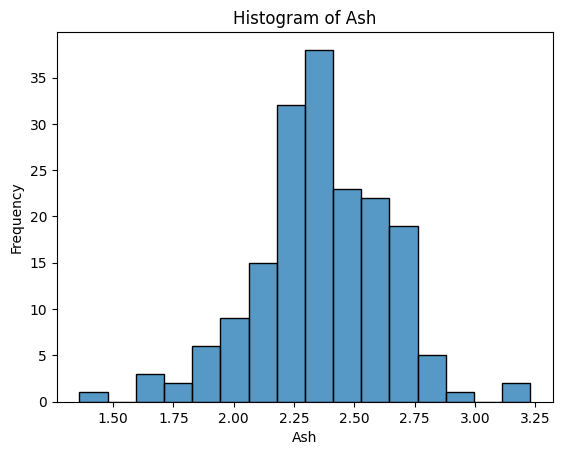

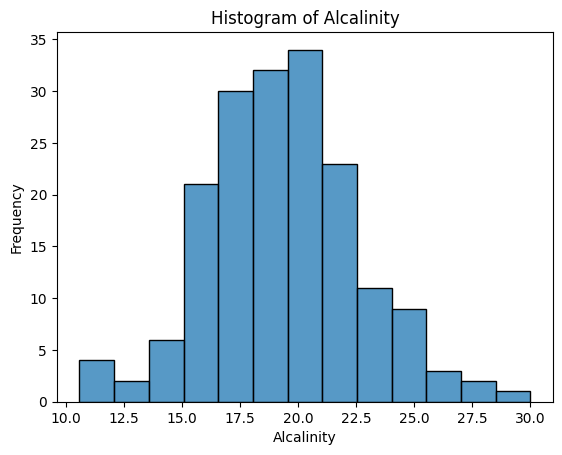

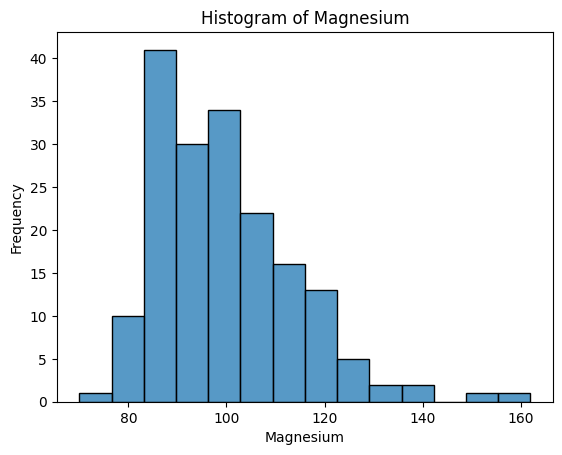

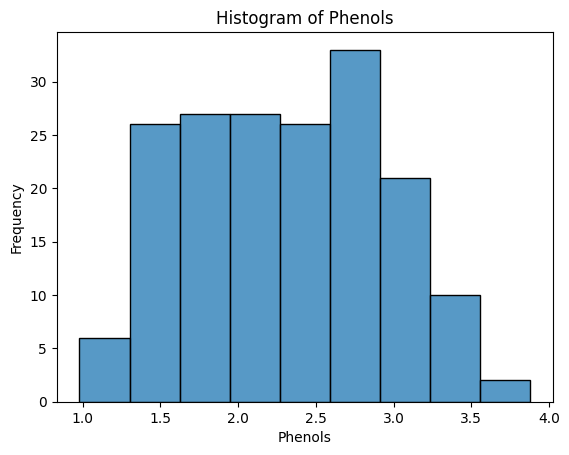

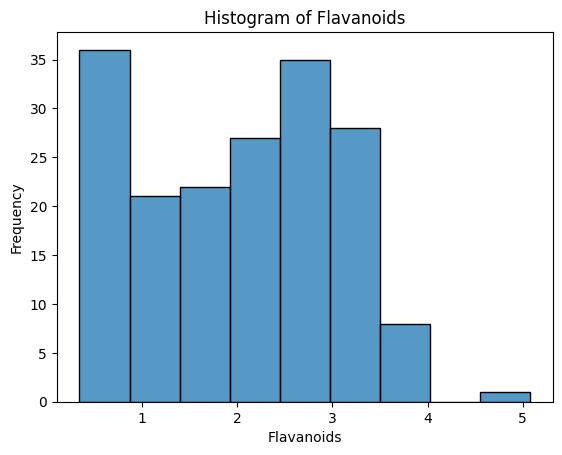

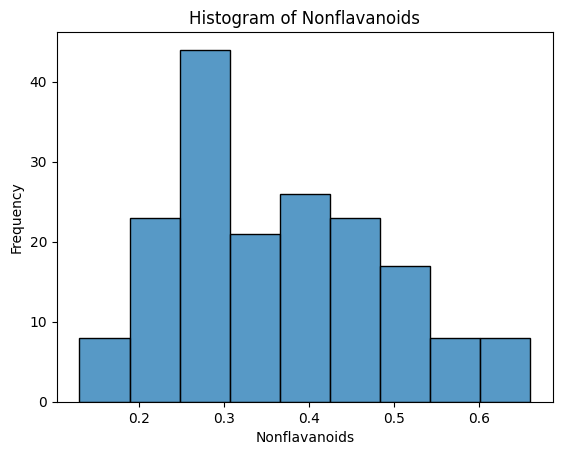

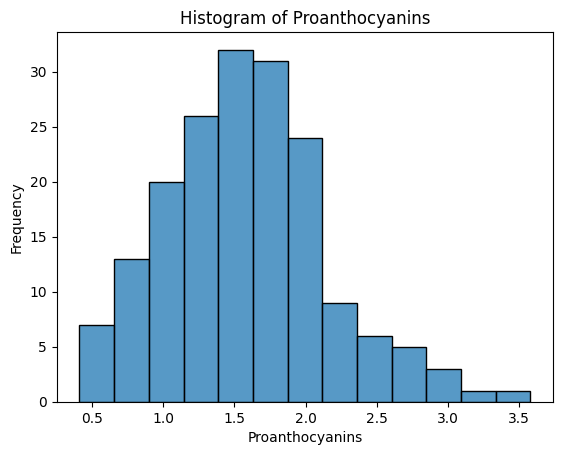

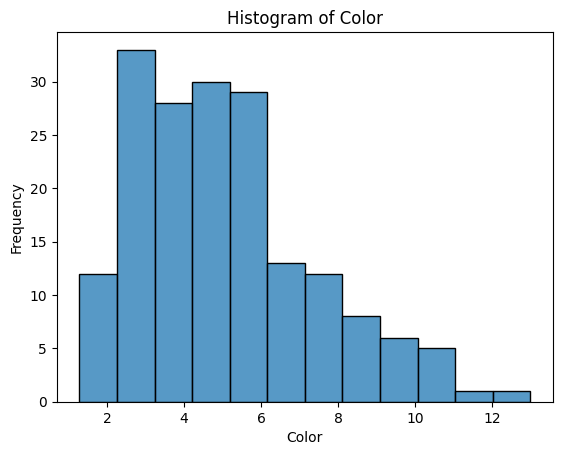

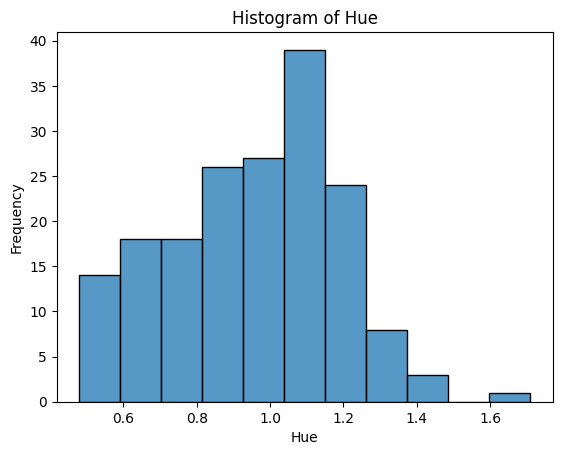

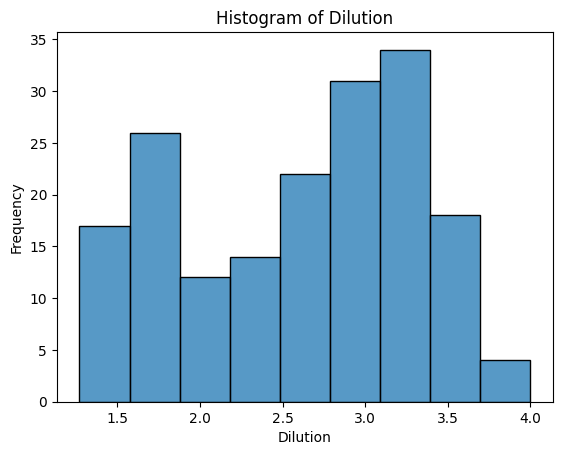

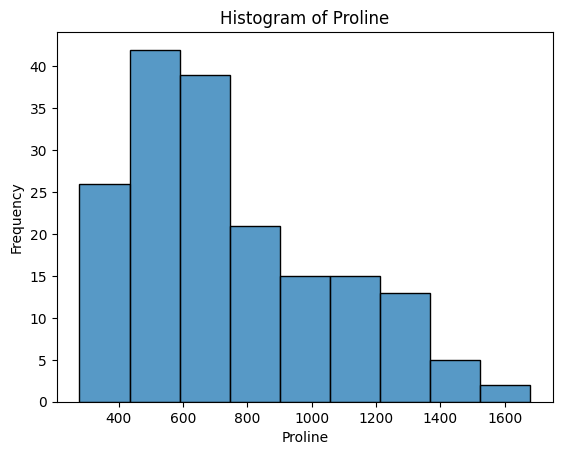

In [ ]:
#histogram
import matplotlib.pyplot as plt
import seaborn as sns
for n in data.columns:
  sns.histplot(data[n])
  plt.xlabel(n)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {n}')
  plt.show()

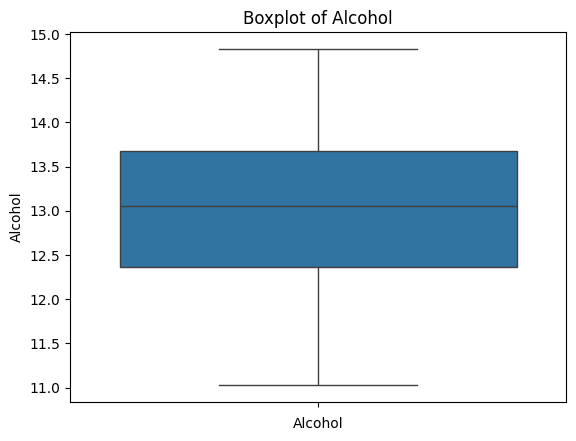

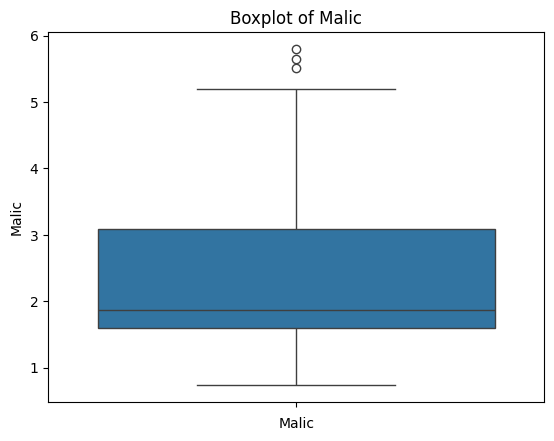

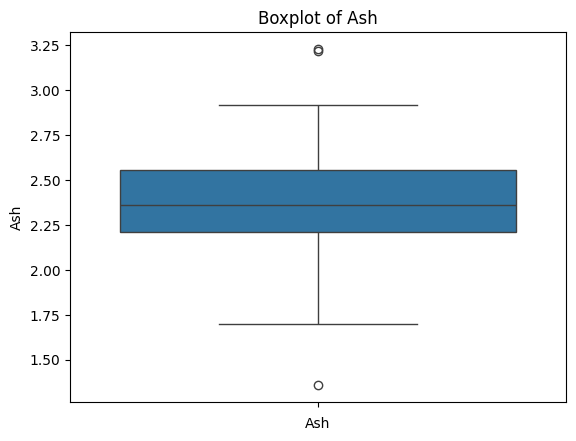

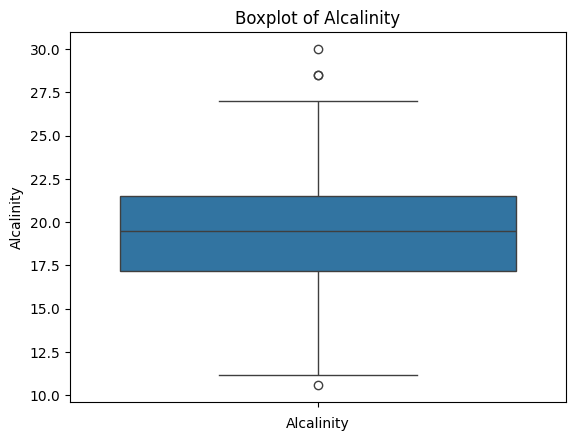

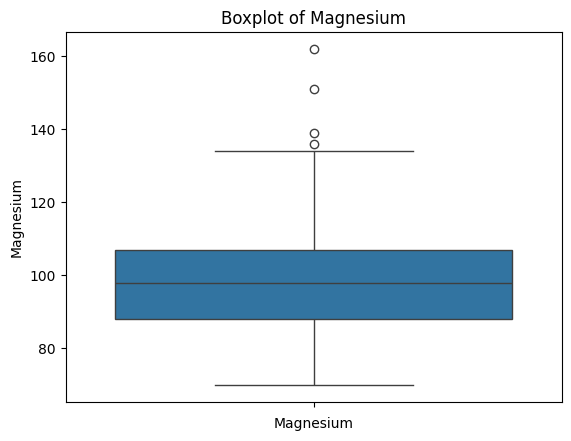

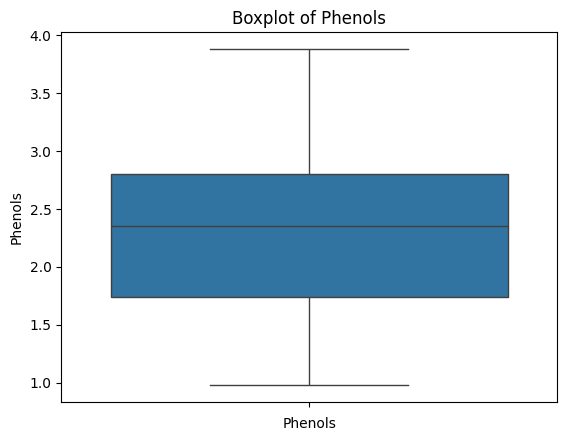

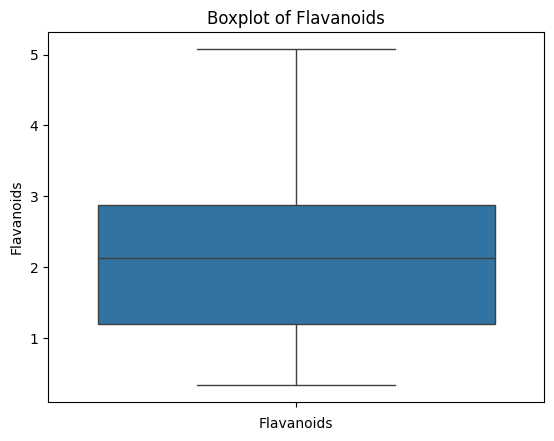

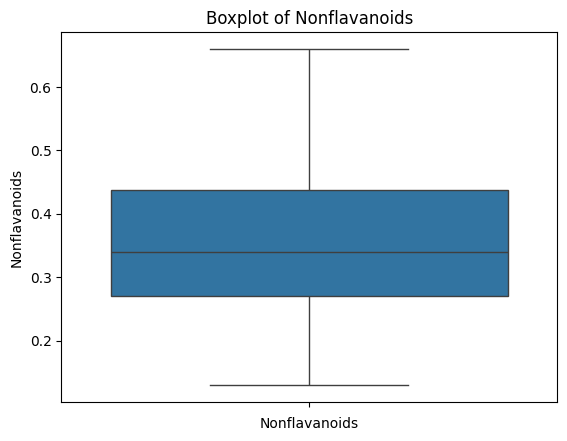

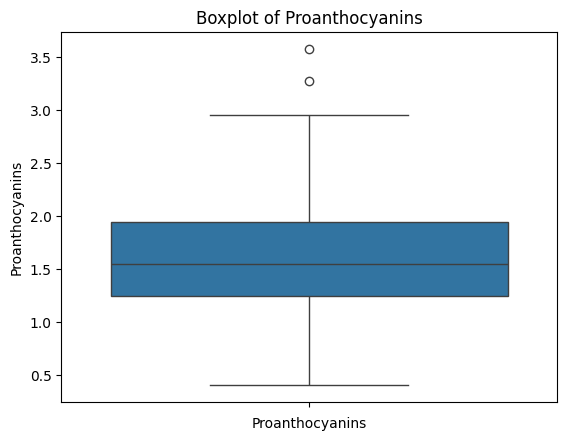

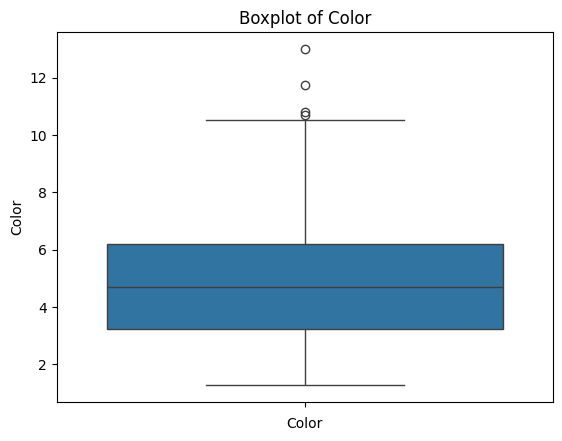

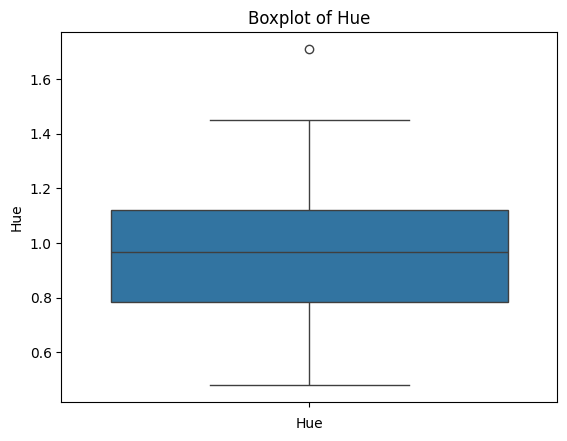

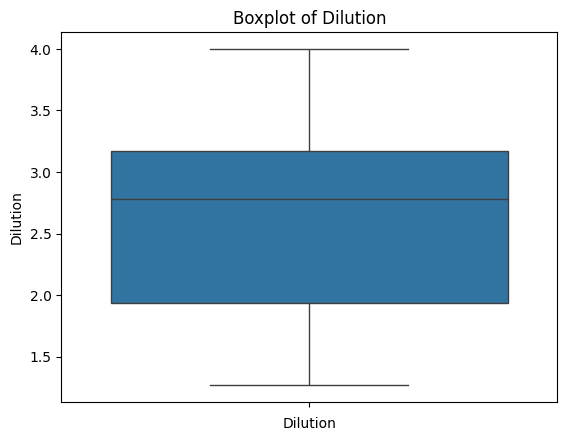

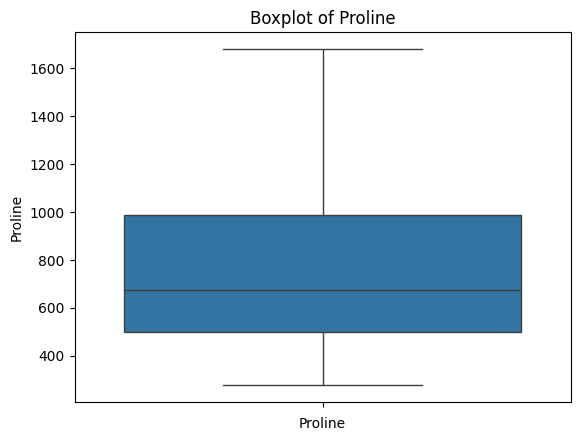

In [ ]:
#boxplot
for n in data.columns:
  sns.boxplot(data[n])
  plt.xlabel(n)
  plt.title(f'Boxplot of {n}')
  plt.show()


In [ ]:
#correalation between features
data.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


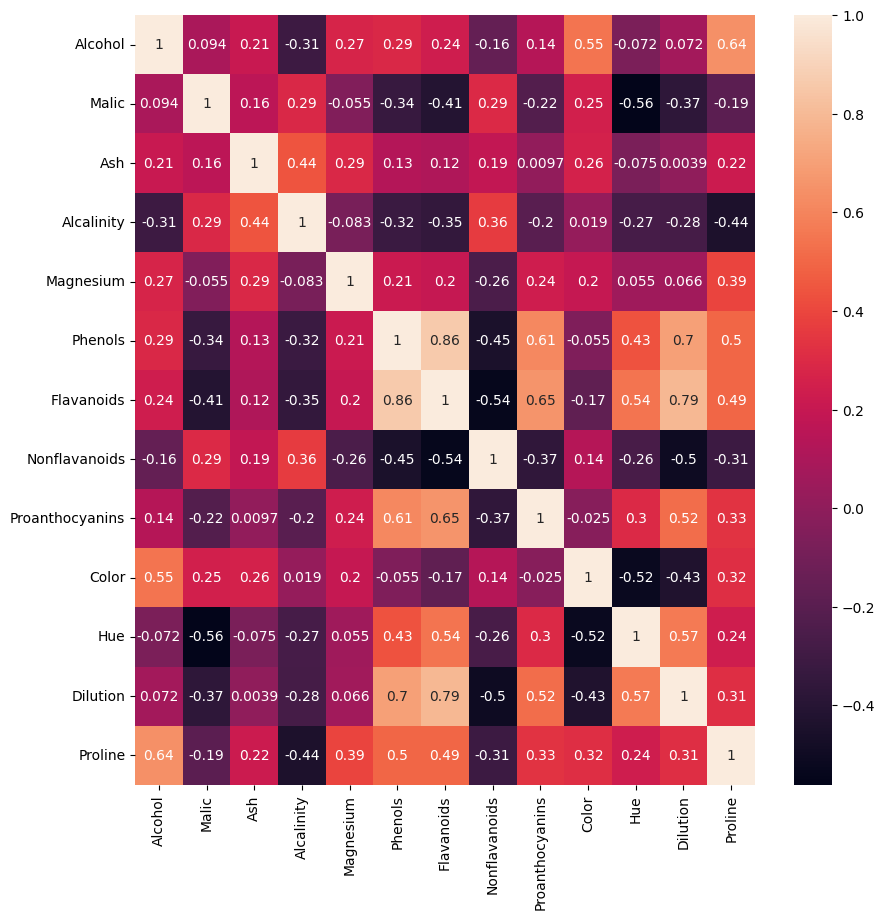

In [ ]:
#heatmap of correalation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Dimensionality Reduction with PCA:

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

In [ ]:
data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_scaled)

PCA()

In [ ]:
#loading the weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

In [ ]:
# The amount of variance that each PCA explains is
pca_explianed=pca.explained_variance_ratio_
pca_explianed

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
# Cumulative variance
pca_cummlative=np.round(np.cumsum(pca_explianed),4)
pca_cummlative

array([0.362 , 0.5541, 0.6653, 0.736 , 0.8016, 0.851 , 0.8934, 0.9202,
       0.9424, 0.9617, 0.9791, 0.992 , 1.    ])

Text(0.5, 1.0, 'Scree Plot')

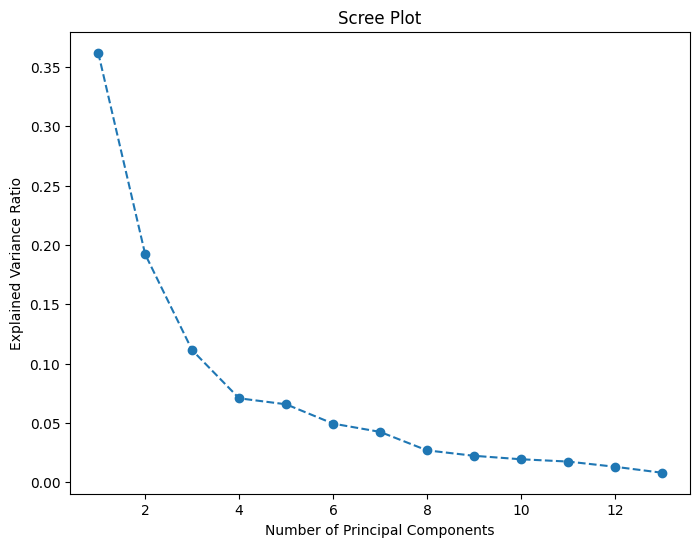

In [ ]:
#screeplot
plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca_explianed)+1),pca_explianed,marker='o',linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Clustering with Original Data:

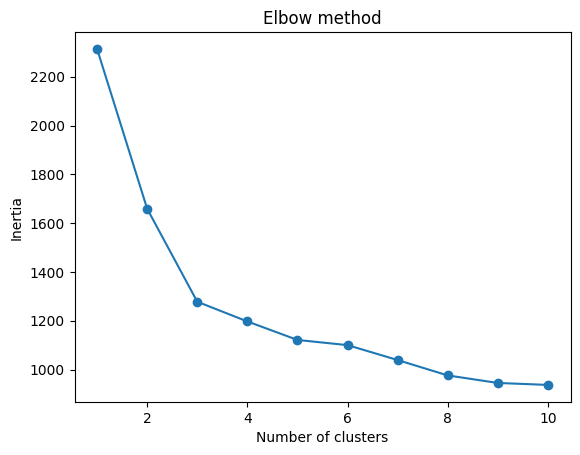

In [ ]:
#k means clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
     kmeans=KMeans(n_clusters=i,random_state=0)
     kmeans.fit(data_scaled)
     wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#apply kmeans
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit_predict(data_scaled)
data['cluster']=kmeans.labels_
print(data.head())

   Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        2  
1           0.26             1.28   4.38  1.05      3.40     1050        2  
2           0.30             2.81   5.68  1.03      3.17     1185        2  
3           0.24             2.18   7.80  0.86      3.45     1480        2  
4           0.39             1.82   4.32  1.04      2.93      735        2  


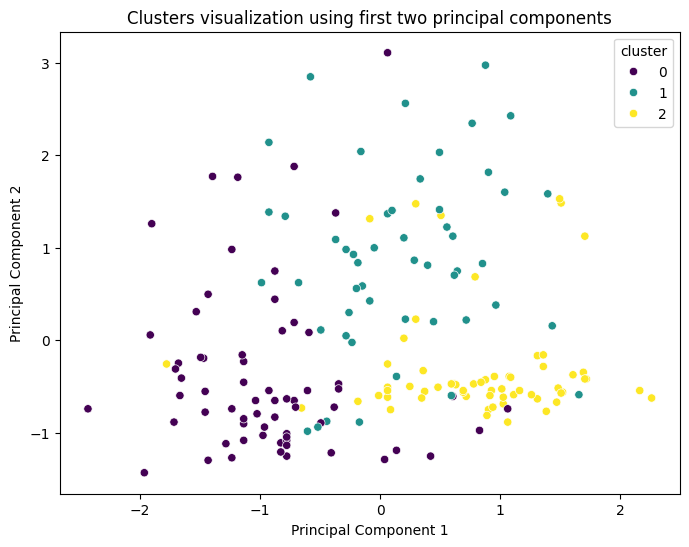

In [ ]:
#2.	Visualize the clustering results using appropriate plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Clusters visualization using first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
#silhouette
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(data_scaled,data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2848589191898987


# Clustering with PCA Data:

In [ ]:
#Apply the same clustering algorithm to the PCA-transformed dataset.
pca=PCA(n_components=2)
pca_data=pca.fit_transform(data_scaled)

In [ ]:
kmeans_pca=KMeans(n_clusters=3,random_state=0)
kmeans_pca.fit_predict(pca_data)
data['cluster']=kmeans_pca.labels_
print(data.head())

   Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        2  
1           0.26             1.28   4.38  1.05      3.40     1050        2  
2           0.30             2.81   5.68  1.03      3.17     1185        2  
3           0.24             2.18   7.80  0.86      3.45     1480        2  
4           0.39             1.82   4.32  1.04      2.93      735        2  


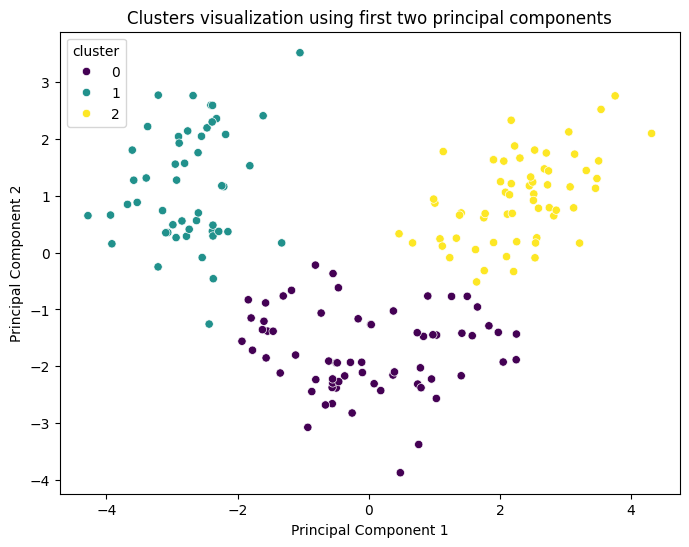

In [ ]:
#visulaize pca data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Clusters visualization using first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#calculate silhosilhouette score for pca data
silhouette_avg_pca=silhouette_score(pca_data,data['cluster'])
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

Silhouette Score (PCA): 0.5601697480957203


Comparison and Analysis:

In [ ]:
#comapring and anaylsis
print(f"Silhouette Score (Original Data): {silhouette_avg}")
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

Silhouette Score (Original Data): 0.2848589191898987
Silhouette Score (PCA): 0.5601697480957203


In [ ]:
if silhouette_avg > silhouette_avg_pca:
    print("Clustering on the original data resulted in better defined clusters.")
elif silhouette_avg < silhouette_avg_pca:
    print("Clustering on the PCA-transformed data resulted in better defined clusters.")
else:
    print("Both clustering methods yielded similar results.")

Clustering on the PCA-transformed data resulted in better defined clusters.


Conclusion and Insights

conclusion:


The decision to use PCA before clustering or to directly apply clustering on the original dataset depends on the specific dataset and the objectives of the analysis.


The dataset has high dimensionality, leading to challenges such as the "curse of dimensionality."

Clustering directly on the original dataset yields better performance metrics than PCA-transformed clustering.

key insights:

PCA often improves clustering performance by focusing on the most informative dimensions, especially for high-dimensional and noisy data.


Comparing clustering metrics (Silhouette Score, Davies–Bouldin Index) on both datasets is essential to make an informed decision.